In [5]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm
from collections import defaultdict
from itertools import combinations

from load_graph import *

DBLP: min coms is 1 and max is 124
DBLP: min coms is 1 and max is 10
DBLP: min coms is 1 and max is 9
DBLP: min coms is 1 and max is 24
DBLP: min coms is 1 and max is 124


100%|██████████| 317080/317080 [00:01<00:00, 194902.19it/s]


Skipped 11112 nodes.


100%|██████████| 317080/317080 [00:00<00:00, 319084.14it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:00<00:00, 332470.43it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:02<00:00, 141269.07it/s]


Skipped 2385 nodes.


100%|██████████| 317080/317080 [00:01<00:00, 244813.12it/s]


Skipped 10702 nodes.


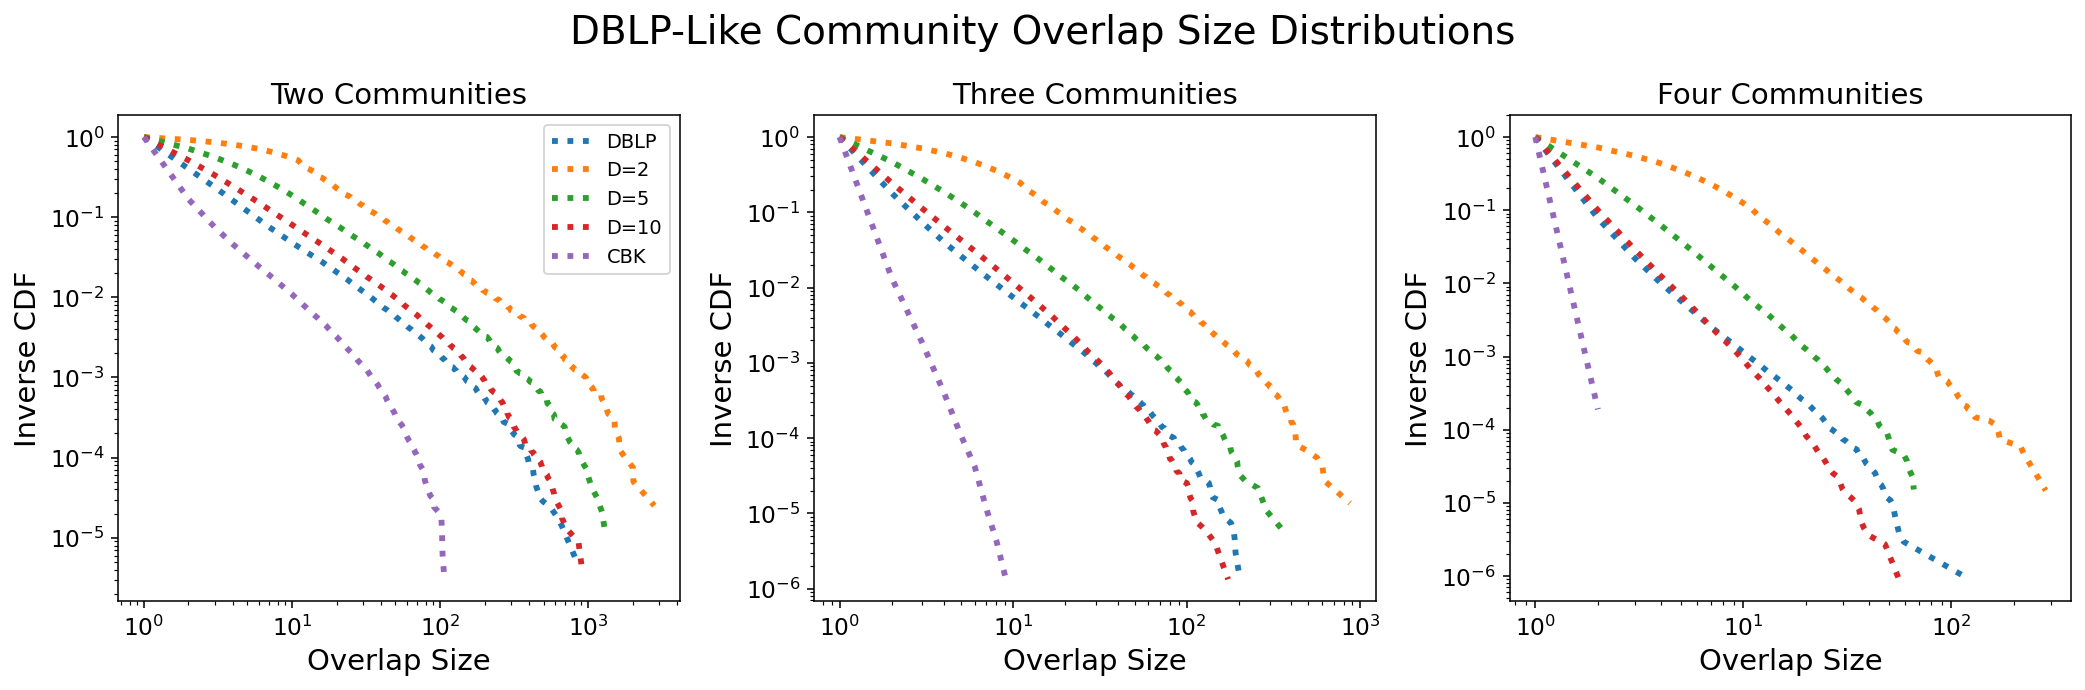

In [6]:
## DBLP graph
g, coms = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_dblp_d2_com.dat", True)
_, abcdoo_d5 = load_coms("data/abcdoo_dblp_d5_com.dat", True)
_, abcdoo_d10 = load_coms("data/abcdoo_dblp_d10_com.dat", True)
_, cbk = load_coms("data/cbk_dblp.dat", True)

print(f"DBLP: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"DBLP: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10: # TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=3, original_data=False, linestyle=":", label=name)
        axs[i].set_xlabel("Overlap Size", fontsize=15)
        axs[i].set_ylabel("Inverse CDF", fontsize=15)
        axs[i].tick_params(labelsize=12)

axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("DBLP-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

Amazon: min coms is 1 and max is 116
Amazon: min coms is 1 and max is 22
Amazon: min coms is 1 and max is 21
Amazon: min coms is 1 and max is 51
Amazon: min coms is 1 and max is 85


100%|██████████| 334863/334863 [00:09<00:00, 34134.22it/s]


Skipped 55553 nodes.


100%|██████████| 334863/334863 [00:13<00:00, 24637.11it/s]


Skipped 60475 nodes.


100%|██████████| 334863/334863 [00:20<00:00, 16311.54it/s]


Skipped 40169 nodes.


100%|██████████| 334863/334863 [00:12<00:00, 26545.30it/s]


Skipped 57568 nodes.


100%|██████████| 334863/334863 [00:00<00:00, 1255202.14it/s]


Skipped 84 nodes.


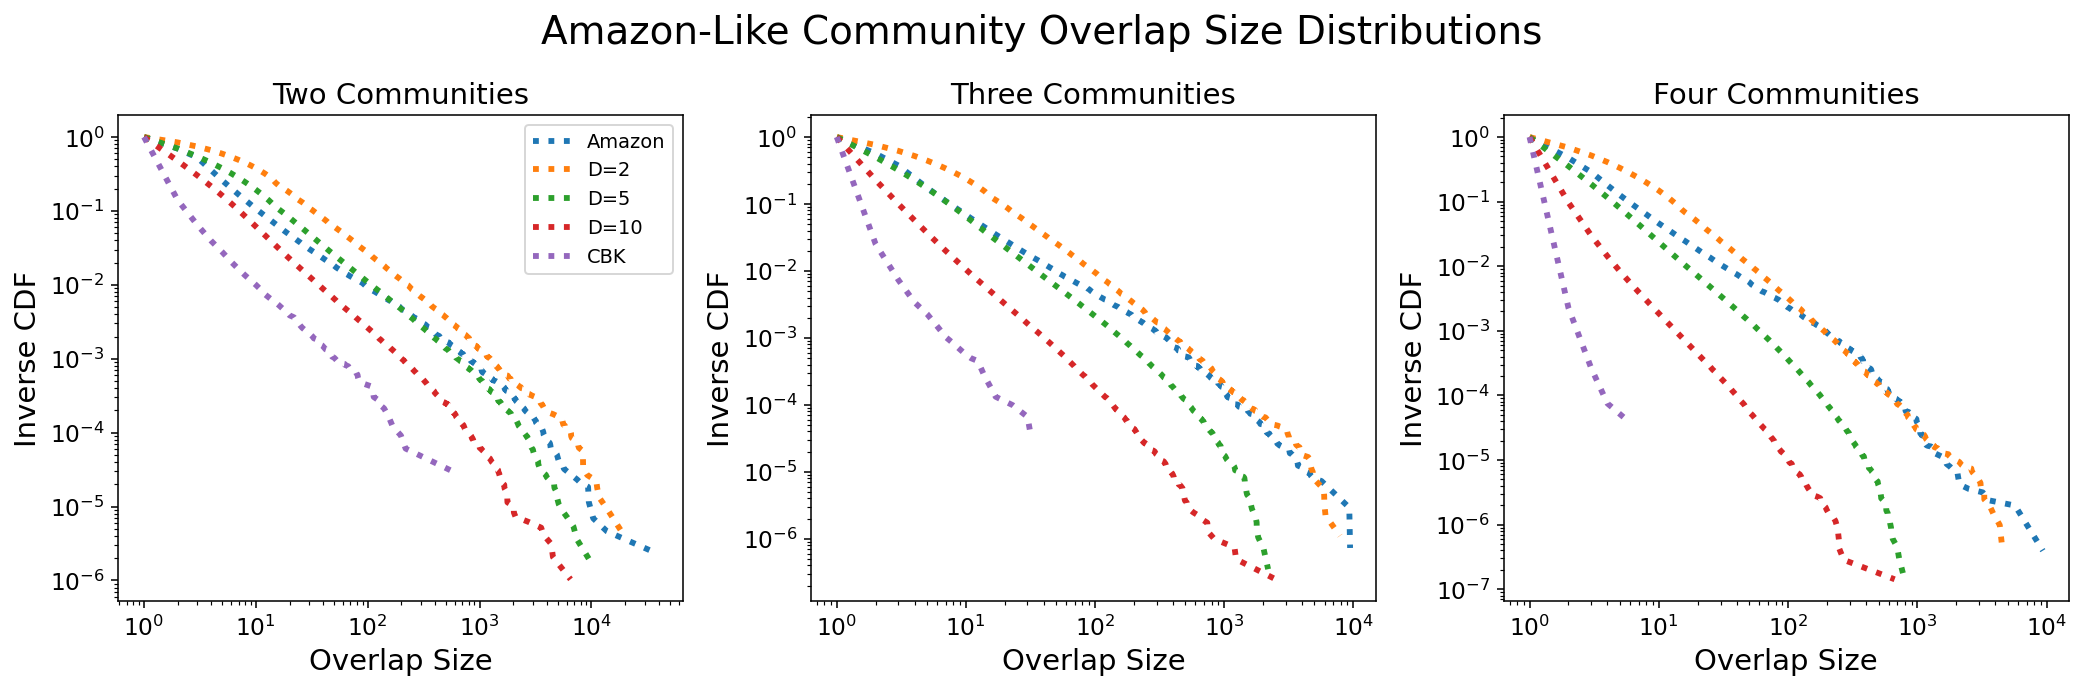

In [7]:
## Amazon graph
g, coms = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_amazon_d2_com.dat", True)
_, abcdoo_d5 = load_coms("data/abcdoo_amazon_d5_com.dat", True)
_, abcdoo_d10 = load_coms("data/abcdoo_amazon_d10_com.dat", True)
_, cbk = load_coms("data/cbk_amazon.dat", True)

print(f"Amazon: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"Amazon: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10:  #TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=3, original_data=False, linestyle=":", label=name)
        axs[i].set_xlabel("Overlap Size", fontsize=15)
        axs[i].set_ylabel("Inverse CDF", fontsize=15)
        axs[i].tick_params(labelsize=12)

axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("Amazon-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

Youtube: min coms is 1 and max is 227
D2: min coms is 1 and max is 7
D5: min coms is 1 and max is 8
D10: min coms is 1 and max is 20
CBK: min coms is 1 and max is 176


100%|██████████| 52675/52675 [00:00<00:00, 239947.70it/s]


Skipped 1616 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 391339.40it/s]


Skipped 0 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 481890.97it/s]


Skipped 0 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 191682.66it/s]


Skipped 242 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 758033.62it/s]


Skipped 218 nodes.


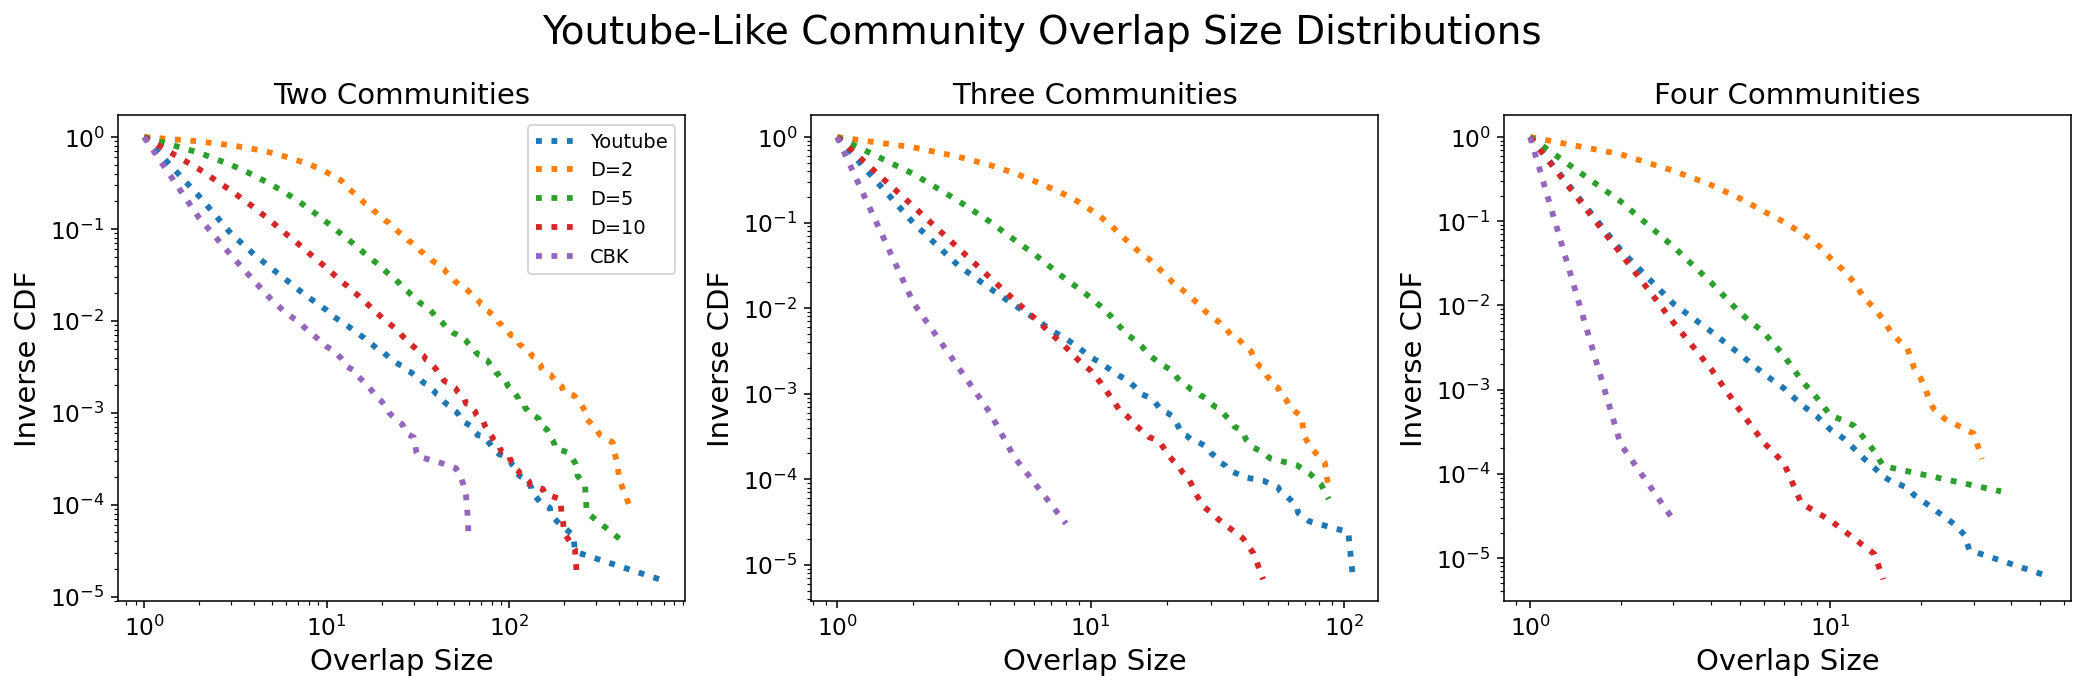

In [8]:
## Youtube graph
g, coms = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_youtube_d2_com.dat", False)
_, abcdoo_d5 = load_coms("data/abcdoo_youtube_d5_com.dat", False)
_, abcdoo_d10 = load_coms("data/abcdoo_youtube_d10_com.dat", False)
_, cbk = load_coms("data/cbk_youtube.dat", False)

print(f"Youtube: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"D2: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"D5: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"D10: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"CBK: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Youtube", "D=2", "D=5", "D=10", "CBK"]
for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10: #TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=3, original_data=False, linestyle=":", label=name)        
        axs[i].set_xlabel("Overlap Size", fontsize=15)
        axs[i].set_ylabel("Inverse CDF", fontsize=15)
        axs[i].tick_params(labelsize=12)

axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("Youtube-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)